In [2]:
# import
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

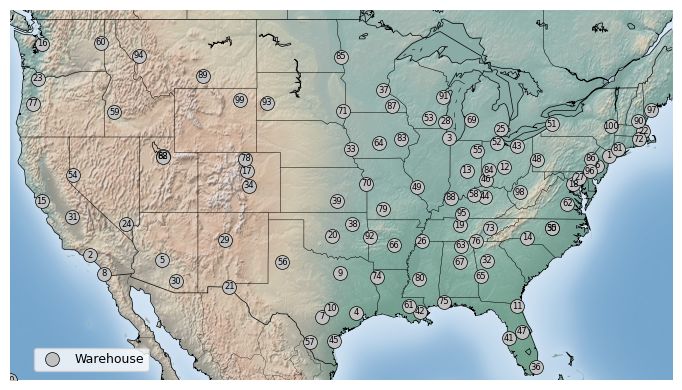

In [3]:
# plot highway
# read data
data = pd.read_csv(f"data/intermodal-204.csv", index_col=False)
# nodes
V_H = data.loc[data['type'] == 'H']['id'].to_list()
# new network
G = nx.DiGraph()
# nodes
lat, lon = [], []
for i in V_H:
    G.add_node(i)
    lat.append(data.loc[data['id'] == i]['lat'].to_list()[0])
    lon.append(data.loc[data['id'] == i]['lon'].to_list()[0])
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
map = Basemap(
    projection='merc',
    llcrnrlat=24.775461,
    llcrnrlon=-125.091283,
    urcrnrlat=49.523682,
    urcrnrlon=-68.543592,
    lat_ts=0,
    resolution='l',
    suppress_ticks=True
)
map.shadedrelief()
# draw map
map.drawcountries(linewidth=0.5)
map.drawstates(linewidth=0.2)
map.drawcoastlines(linewidth=0.5)
# adjust coordinates
x, y = map(lon, lat)
pos = {
    i: (x[i - 1], y[i - 1]) if i != 40 else (0, 0)
    for i in V_H
}
# draw nodes
nx.draw(
    G, pos, ax=ax, nodelist=V_H,
    node_color='silver', node_size=100, edgecolors='black', linewidths=0.5,
    label='Warehouse', labels={i: i for i in V_H}, font_size=6
)
fig.legend(loc=(0.05, 0.05), fontsize=9)
fig.tight_layout()
fig.savefig("figs/H.png", dpi=300)

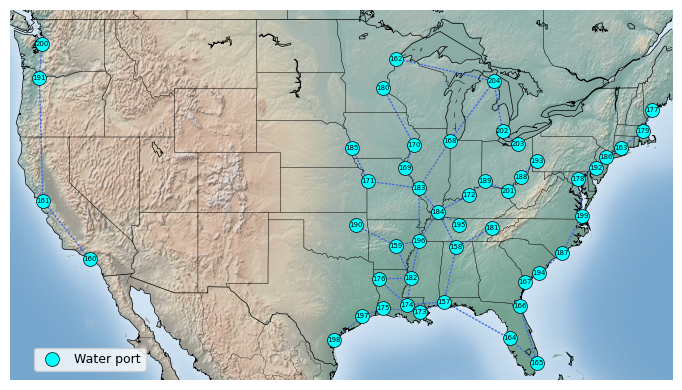

In [11]:
# plot waterway
# read data
data = pd.read_csv(f"data/intermodal-204.csv", index_col=False)
# nodes
V_W = data.loc[data['type'] == 'W']['id'].to_list()
# new network
G = nx.DiGraph()
# nodes
lat, lon = [], []
for i in V_W:
    G.add_node(i)
    lat.append(data.loc[data['id'] == i]['lat'].to_list()[0])
    lon.append(data.loc[data['id'] == i]['lon'].to_list()[0])
# waterway, adj
adj_W = pd.read_csv(
    f"data/W-adj.csv", index_col=0
)
edge_W = []
for i in V_W:
    neighbors = []
    for j in V_W:
        if adj_W.loc[i, f'{j}'] == 1 or adj_W.loc[j, f'{i}'] == 1:
            neighbors.append(j)
    for j in neighbors:
        G.add_edge(i, j, type='W')
        if i < j:
            edge_W.append((i, j))
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
map = Basemap(
    projection='merc',
    llcrnrlat=24.775461,
    llcrnrlon=-125.091283,
    urcrnrlat=49.523682,
    urcrnrlon=-68.543592,
    lat_ts=0,
    resolution='l',
    suppress_ticks=True
)
map.shadedrelief()
# draw map
map.drawcountries(linewidth=0.5)
map.drawstates(linewidth=0.2)
map.drawcoastlines(linewidth=0.5)
# adjust coordinates
x, y = map(lon, lat)
pos = {
    i: (x[i - 157], y[i - 157])
    for i in V_W
}
# draw
nx.draw(
    G, pos, ax=ax, nodelist=V_W, edgelist=edge_W,
    node_color='aqua', node_size=100, edgecolors='black',
    edge_color='royalblue', style=':', arrowstyle='-',
    linewidths=0.5, width=1, label='Water port'
)
nx.draw_networkx_labels(
    G, pos, ax=ax, labels={i: i for i in V_W}, font_size=5
)
fig.legend(loc=(0.05, 0.05), fontsize=9)
fig.tight_layout()
fig.savefig("figs/W.png", dpi=300)

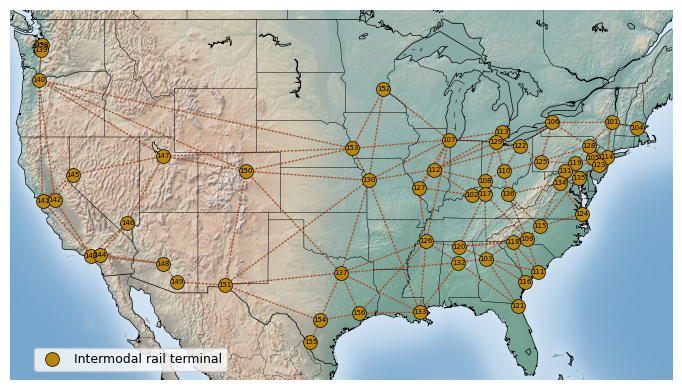

In [13]:
# plot railway - combined
# read data
data = pd.read_csv(f"data/intermodal-204.csv", index_col=False)
# nodes
V_R = data.loc[data['type'] == 'R']['id'].to_list()
# new network
G = nx.DiGraph()
# nodes
lat, lon = [], []
for i in V_R:
    G.add_node(i)
    lat.append(data.loc[data['id'] == i]['lat'].to_list()[0])
    lon.append(data.loc[data['id'] == i]['lon'].to_list()[0])
# railway
adj_R = pd.read_csv(
    f"data/R-adj.csv", index_col=0
)
edge_R = []
for i in V_R:
    neighbors = []
    # for intermodal-20
    for j in V_R:
        if adj_R.loc[i, f'{j}'] == 1 or adj_R.loc[j, f'{i}'] == 1:
            neighbors.append(j)
    for j in neighbors:
        G.add_edge(i, j, type='R')
        if i < j:
            edge_R.append((i, j))
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
map = Basemap(
    projection='merc',
    llcrnrlat=24.775461,
    llcrnrlon=-125.091283,
    urcrnrlat=49.523682,
    urcrnrlon=-68.543592,
    lat_ts=0,
    resolution='l',
    suppress_ticks=True
)
map.shadedrelief()
# draw map
map.drawcountries(linewidth=0.5)
map.drawstates(linewidth=0.2)
map.drawcoastlines(linewidth=0.5)
# adjust coordinates
x, y = map(lon, lat)
pos = {
    i: (x[i - 101], y[i - 101])
    for i in V_R
}
# draw nodes
# nx.draw_networkx_nodes(
#     G, pos, ax=ax, nodelist=V_R,
#     node_color='darkgoldenrod', node_size=600, edgecolors='black',
#     label='Intermodal rail station'
# )
# draw
nx.draw(
    G, pos, ax=ax, nodelist=V_R, edgelist=edge_R,
    node_color='darkgoldenrod', node_size=100, edgecolors='black',
    edge_color='sienna', style=':', arrowstyle='-',
    linewidths=0.5, width=1, label='Intermodal rail terminal', with_labels=True,
    labels={i: i for i in V_R}, font_size=5
)
# nx.draw_networkx_labels(
#     G, pos, ax=ax, labels={i: i for i in V_R}, font_size=6
# )
# draw edge
# nx.draw_networkx_edges(
#     G, pos, ax=ax, edgelist=edge_R, style='--', width=2,
#     edge_color='sienna', arrowstyle='-',
#     label='Railway'
# )
fig.legend(loc=(0.05, 0.05), fontsize=9)
fig.tight_layout()
fig.savefig("figs/R.png", dpi=300)